In [3]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
import pigleg_cv
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
!pwd

/webapps/piglegsurgery/piglegcv


In [5]:
import torch
torch.cuda.is_available()

False

In [6]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [6]:
torch.__version__

'1.12.0a0+8a1a93a'

In [7]:
Path("~/.cache/torch/hub/checkpoints/").expanduser().exists()

True

In [8]:
!ls ~/.cache/torch/hub/checkpoints/

yolox_x_8x8_300e_coco_20211126_140254-1ef88d67.pth


In [9]:
# pip install mmcv-full

# Run whole video processing

In [10]:
is_microsurgery = False
test_first_seconds=False
n_stitches = 3

patch = "*/Anasto*.mp4"
# patch = "*/2023_10_11_B-Grübbel_Mareike_Fortlaufende_Transkutannaht.mov"
# patch = "Einzel.MOV"
patch = "test_4.mp4"; n_stitches=0
# patch = "micro_01*.mp4"
# patch = "2023_10_11_B_Seltmann_Charlotte_fortlaufende_Transcutannaht.mp4"; n_stitches=5
# patch = "Katharina_Einzelknopfnaht"; n_stitches=3


img_pths = list(Path("../piglegsurgeryweb/media/upload/").glob(f"*/*{patch}*"))
filename = img_pths[0]
outputdir = Path("./del_test_video_output/") / filename.name


In [11]:


# original outputdir
# outputdir = list(list(Path("../piglegsurgeryweb/media/").glob(f"*/*{patch}*.zip"))[0].parent.glob("*/meta.json"))[0].parent
# outputdir = outputdir.absolute().resolve()
# outputdir

## Do whole processing together


In [ ]:
dcv = pigleg_cv.DoComputerVision(img_pths[0], outputdir, test_first_seconds=test_first_seconds, is_microsurgery=is_microsurgery)
dcv._run_tracking

dcv._make_sure_media_is_cropped()

dcv.run_image_processing()
dcv.meta["is_microsurgery"] = dcv.is_microsurgery
dcv.meta["n_stitches_by_user"] = dcv.n_stitches
dcv._run_tracking()
dcv._find_stitch_ends_in_tracks(
    n_clusters=dcv.n_stitches,
    plot_clusters=True,
    clusters_image_path=dcv.outputdir / "_stitch_clusters.jpg",
)

# dcv.run()

In [27]:
## deterministic profiles
# from cProfile import Profile
# from pstats import SortKey, Stats
# with Profile() as profile:
#     dcv._make_report(cut_frames=dcv.meta["stitch_split_frames"])(
#         Stats(profile)
#         .strip_dirs()
#         .sort_stats(SortKey.CALLS)
#         .print_stats()
#     )



In [24]:
# !pip install pyinstrument

2023-12-29 00:19:17.172 | DEBUG    | run_report:main_report:952 - is_microsurgery=False, cut_frames=[]
2023-12-29 00:19:17.282 | DEBUG    | run_report:main_report:1055 - size_input_video: [720, 536], size_output_video: [1119, 420], size_output_img: [564, 420], resize_factor: 0.7835820895522388
2023-12-29 00:19:17.299 | DEBUG    | run_report:main_report:1070 - MMpose data M=
2023-12-29 00:19:17.313 | DEBUG    | run_report:bboxes_to_points:726 - Sort data N=95
2023-12-29 00:19:17.316 | DEBUG    | run_report:bboxes_to_points:727 - data_pixels=[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
2023-12-29 00:19:17.327 | DEBUG    | tools:save_json:16 - Writing 'del_test_video_output/pigleg_test_4.mp4/tracks_points.json'
2023-12-29 00:19:17.331 | DEBUG    | tools:save_json:27 - updated keys: ['frame_ids', 'data_pixels']
2023-12-29 00:19:17.345 | DEBUG    | run_report:create_video_report_figure:536 - cut_frames=[]
2023-12-29 00:19:17.348 | DEBUG    | run_report:create_video_report_fi

8204.827250936069


2023-12-29 00:19:17.564 | DEBUG    | run_report:create_video_report_figure:615 - main_video_report: OK
2023-12-29 00:19:17.754 | DEBUG    | run_report:main_report:1129 - Report on frame 0 done, 0.00% (0.47s elapsed, 1000.00s remaining)
2023-12-29 00:19:20.305 | DEBUG    | run_report:main_report:1129 - Report on frame 50 done, 52.63% (3.02s elapsed, 2.72s remaining)
2023-12-29 00:19:22.303 | DEBUG    | run_report:main_report:1212 - pix_size=0.0004575163398692811
2023-12-29 00:19:22.313 | DEBUG    | run_report:main_report:1213 - frameshape=(420, 1119, 3)
2023-12-29 00:19:22.315 | DEBUG    | run_report:main_report:1214 - confidence_score_thr=0.0
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample -

bbox
[188.51731872558594, 314.27418518066406, 493.8002166748047, 421.7787628173828, 0.9969009160995483]


/home/appuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2023-12-29 00:19:26.367 | DEBUG    | run_report:main_report:1248 - per stitch analysis object_full_name='Forceps' frame_idx_start=0 frame_idx_stop=4
2023-12-29 00:19:26.612 | DEBUG    | run_report:create_pdf_report_for_one_tool:332 - main_report: figures del_test_video_output/pigleg_test_4.mp4/graph_1c_forceps_trajectory_all.jpg is saved
2023-12-29 00:19:26.912 | DEBUG    | run_report:create_pdf_report_for_one_tool:361 - main_report: figures del_test_video_output/pigleg_test_4.mp4/fig_1a_forceps_graph_all.jpg is saved
2023-12-29 00:19:26.928 | DEBUG    | run_report:create_heatmap_report_plt:171 - points.shape=(4, 2)
/home/appuser/.local/lib/python3.8/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
2023-12-29 00:19:27.202 | 

main_report: Video file del_test_video_output/pigleg_test_4.mp4/__cropped.mp4 is processed!


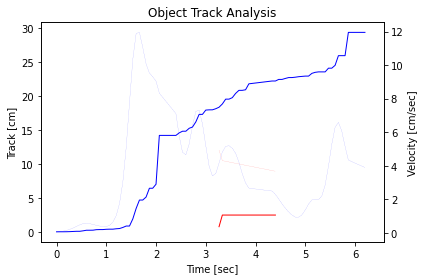

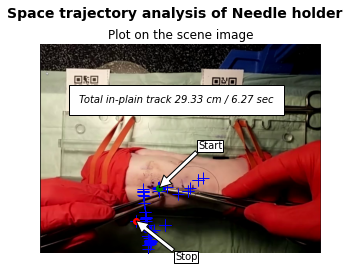

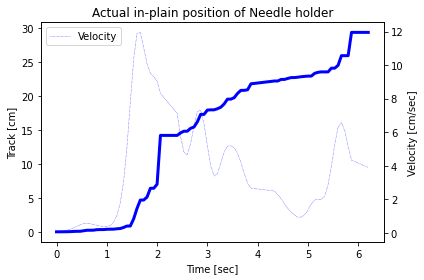

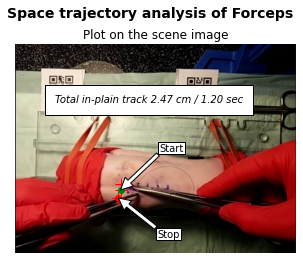

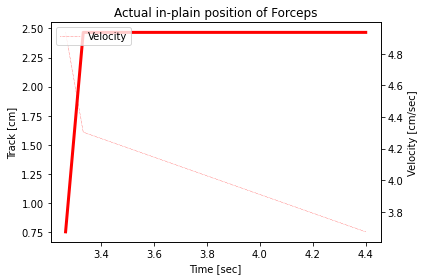

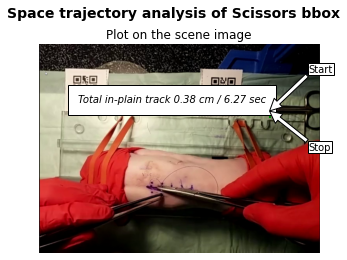

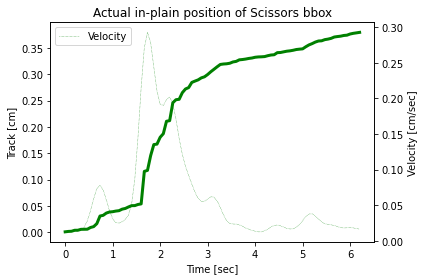

In [34]:
from pyinstrument import Profiler
with Profiler(interval=0.02) as profiler:
    dcv._make_report(cut_frames=dcv.meta["stitch_split_frames"])

In [35]:
profiler.print()


  _     ._   __/__   _ _  _  _ _/_   Recorded: 00:19:17  Samples:  355
 /_//_/// /_\ / //_// / //_'/ //     Duration: 10.830    CPU time: 9.212
/   _/                      v4.6.1

Program: /opt/conda/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/appuser/.local/share/jupyter/runtime/kernel-f704adcb-7f3f-42c6-9361-10e73b240a0b.json

10.810 <cell line: 2>  ../../../tmp/ipykernel_505/356217478.py:2
└─ 10.810 DoComputerVision._make_report  pigleg_cv.py:529
   └─ 10.810 main_report  run_report.py:906
      ├─ 2.925 plot3  run_report.py:500
      │  └─ 2.905 Figure.savefig  matplotlib/figure.py:2923
      │        [38 frames hidden]  matplotlib
      ├─ 2.485 system  <built-in>
      ├─ 1.866 create_pdf_report_for_one_tool  run_report.py:219
      │  ├─ 1.255 savefig  matplotlib/pyplot.py:976
      │  │     [34 frames hidden]  matplotlib, <built-in>, PIL
      │  ├─ 0.222 Figure.tight_layout  matplotlib/figure.py:3189
      │  │     [6 frames hidden]  matplotlib
      │  └─ 0.12

In [29]:
# with skimage.transform.resize
profiler.print()


  _     ._   __/__   _ _  _  _ _/_   Recorded: 00:03:00  Samples:  701
 /_//_/// /_\ / //_// / //_'/ //     Duration: 16.762    CPU time: 26.226
/   _/                      v4.6.1

Program: /opt/conda/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/appuser/.local/share/jupyter/runtime/kernel-f704adcb-7f3f-42c6-9361-10e73b240a0b.json

16.754 <cell line: 2>  ../../../tmp/ipykernel_505/356217478.py:2
└─ 16.754 DoComputerVision._make_report  pigleg_cv.py:529
   └─ 16.754 main_report  run_report.py:906
      ├─ 6.859 resize  skimage/transform/_warps.py:19
      │     [20 frames hidden]  skimage, <__array_function__ internal...
      │        5.271 warp  skimage/transform/_warps.py:684
      │        ├─ 3.970 [self]  skimage/transform/_warps.py
      ├─ 4.709 plot3  run_report.py:500
      │  └─ 4.709 Figure.savefig  matplotlib/figure.py:2923
      │        [44 frames hidden]  matplotlib
      ├─ 1.907 create_pdf_report_for_one_tool  run_report.py:219
      │  ├─ 1.359 savefig  m

In [30]:
profiler.open_in_browser()

'/tmp/tmpwg8lzr2x.html'

In [12]:
# report_data = dcv.make_report()